In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance

from models import *

In [2]:
# 한글 폰트 깨지지 않게 하기
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 불러오기

raw_data = pd.read_csv("../../01.files/02.Bigsata_analysis/통신고객이탈.csv", encoding = 'euc-kr')
raw_data.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [4]:
raw_data.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [5]:
raw_x = raw_data.drop(['CHURN','CUSTOMER_ID'], axis = 1)
raw_y = raw_data['CHURN'].map({'Active':0, 'Churned':1})
print(raw_x.shape, raw_y.shape)

(930, 13) (930,)


In [6]:
raw_dummy_x = pd.get_dummies(raw_x)
raw_dummy_x.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


In [7]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(raw_dummy_x, raw_y, test_size = 0.3, random_state=1234)

print("분할 전 설명변수 데이터 :", raw_dummy_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (930, 33)
분할 후 설명변수 데이터 :Train (651, 33)   Test (279, 33)


### 그래디언트 부스팅

In [39]:
# 모델 생성
model_name = 'gb'

gb_raw = GradientBoostingClassifier(random_state = 1234)
gb_raw.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_raw.score (df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_raw.score (df_test_x, df_test_y)))

Accuracy on training set: 0.971
Accuracy on test set: 0.885


In [40]:
gb_raw.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [41]:
# default 파라미터 세팅

hyperparameters = {
    'n_estimators' : [100],
    'min_samples_leaf' : [1],
    'min_samples_split' : [2],
    'max_depth' : [3],
    'lr' : [0.1]
}        

#### 1. learning_rate 조정

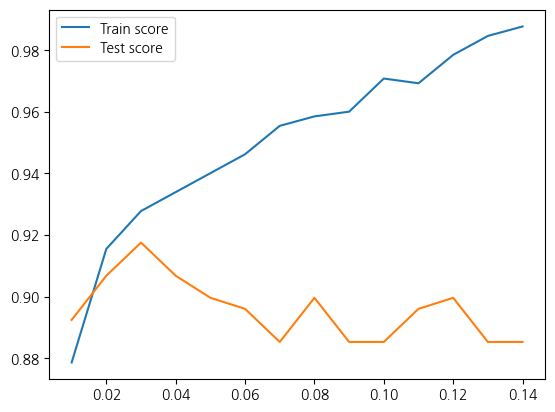

In [42]:
hyperparameters['lr'] = [x for x in np.arange(0.01, 0.15, 0.01)]
df_score_lr = run_models_classification(hyperparameters, df_train_x, df_train_y, df_test_x, df_test_y, model_name, 'lr', 1)

In [43]:
df_score_lr.round(3)

,lr,TrainScore,TestScore
0,0.01,0.879,0.892
1,0.02,0.916,0.907
2,0.03,0.928,0.918
3,0.04,0.934,0.907
4,0.05,0.940,0.900
5,0.06,0.946,0.896
6,0.07,0.955,0.885
7,0.08,0.959,0.900
8,0.09,0.960,0.885
9,0.10,0.971,0.885


learning_rate가 높아짐에 따라 train 데이터셋에 대한 성능은 계속해서 높아진다    
반면 test 데이터셋에 대한 성능은 0.4 정도에 계속 머물러 있으므로, 과적합의 위험이 있다고 판단된다    
이에 따라 test데이터셋의 성능이 떨어지기 직전인 learning_rate = 0.05를 선택한다.

In [44]:
hyperparameters['lr'] = [0.05]

#### 2. n_estimators 조정

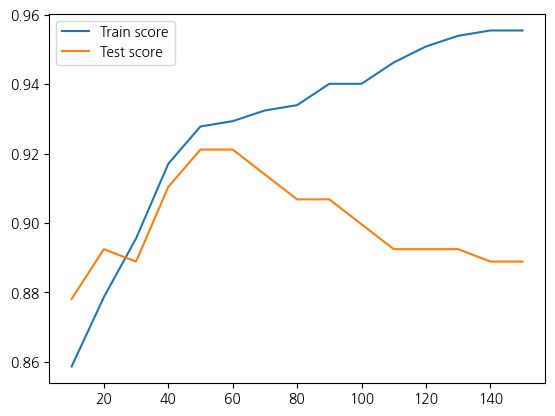

In [45]:
hyperparameters['n_estimators'] = [x * 10 for x in range(1,16)]
df_score_n = run_models_classification(hyperparameters, df_train_x, df_train_y, df_test_x, df_test_y, model_name, 'n_estimators', 1)

In [46]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.859,0.878
1,20,0.879,0.892
2,30,0.896,0.889
3,40,0.917,0.910
4,50,0.928,0.921
5,60,0.929,0.921
6,70,0.932,0.914
7,80,0.934,0.907
8,90,0.940,0.907
9,100,0.940,0.900


n_estimators가 70, 80이 되는 지점에서 test데이터셋의 성능이 최고점을 찍으며,    
train데이터셋의 성능 또한 높으므로 80을 선택하였다. 

In [47]:
hyperparameters['n_estimators'] = [80]

#### 3. max_depth 조정

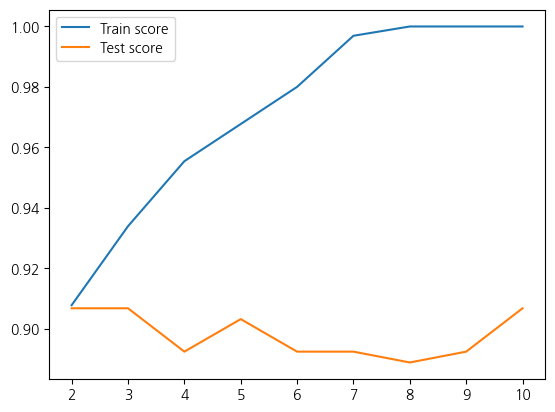

In [48]:
hyperparameters['max_depth'] = [x for x in range(2,11)]
df_score_depth = run_models_classification(hyperparameters, df_train_x, df_train_y, df_test_x, df_test_y, model_name, 'max_depth', 1)

In [49]:
df_score_depth

,max_depth,TrainScore,TestScore
0,2,0.907834,0.906810
1,3,0.933948,0.906810
2,4,0.955453,0.892473
3,5,0.967742,0.903226
4,6,0.980031,0.892473
5,7,0.996928,0.892473
6,8,1.000000,0.888889
7,9,1.000000,0.892473
8,10,1.000000,0.906810


max_depth가 깊어질수록, 과적합의 모습을 보인다
따라서 test 데이터셋이 낮아지는 지점인 3을 선택하였다.

In [50]:
hyperparameters['max_depth'] = [3]

#### 4. min_samples_split 조정

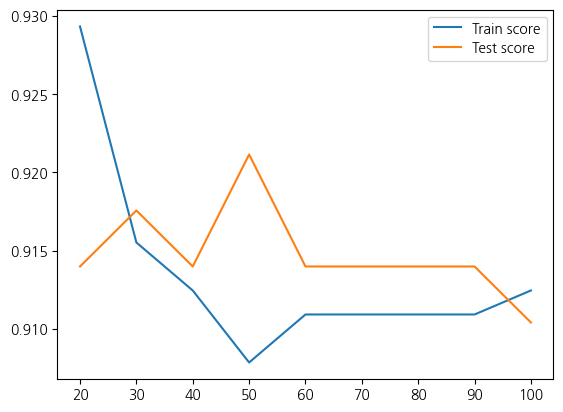

In [51]:
hyperparameters['min_samples_split'] = [x * 10 for x in range(2,11)]
df_score_split = run_models_classification(hyperparameters, df_train_x, df_train_y, df_test_x, df_test_y, model_name, 'min_samples_split',1)

In [52]:
df_score_split

,min_samples_split,TrainScore,TestScore
0,20,0.929339,0.913978
1,30,0.915515,0.917563
2,40,0.912442,0.913978
3,50,0.907834,0.921147
4,60,0.910906,0.913978
5,70,0.910906,0.913978
6,80,0.910906,0.913978
7,90,0.910906,0.913978
8,100,0.912442,0.910394


min_samples_splits이 높아질수록 train 데이터셋에 대한 성능 저하가 보임      
40을 선택

In [53]:
hyperparameters['min_samples_split'] = [40]

#### 5. min_samples_leaf 조정

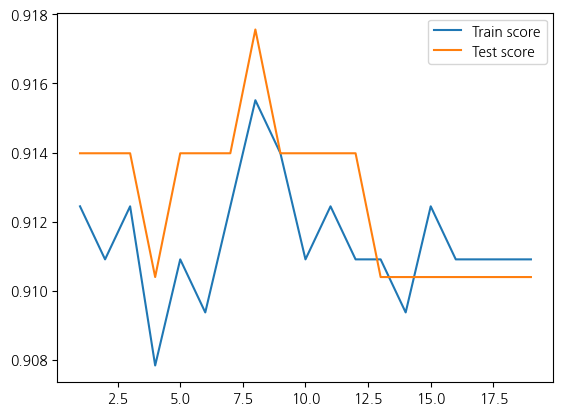

In [54]:
hyperparameters['min_samples_leaf'] = [x for x in range(1,20)]
df_score_leaf = run_models_classification(hyperparameters, df_train_x, df_train_y, df_test_x, df_test_y, model_name, 'min_samples_leaf', 1)

In [55]:
df_score_leaf

,min_samples_leaf,TrainScore,TestScore
0,1,0.912442,0.913978
1,2,0.910906,0.913978
2,3,0.912442,0.913978
3,4,0.907834,0.910394
4,5,0.910906,0.913978
5,6,0.909370,0.913978
6,7,0.912442,0.913978
7,8,0.915515,0.917563
8,9,0.913978,0.913978
9,10,0.910906,0.913978


min_samples_leaf가 증가할 때 두 데이터셋의 증감이 함께 따라가는 것이 확인된다      
따라서 과적합을 방지하고, 좋은 성능을 내는 지점을 선택하기 위해 8을 선택하였다

In [56]:
hyperparameters['min_samples_leaf'] = [8]

In [57]:
# 최종 선택된 파라미터
hyperparameters

{'n_estimators': [80],
 'min_samples_leaf': [8],
 'min_samples_split': [40],
 'max_depth': [3],
 'lr': [0.05]}

In [58]:
v_feature_name = df_train_x.columns
gb_final = GradientBoostingClassifier(n_estimators=hyperparameters['n_estimators'][0],
                                     min_samples_leaf = hyperparameters['min_samples_leaf'][0], 
                                     min_samples_split = hyperparameters['min_samples_split'][0],
                                     max_depth = hyperparameters['max_depth'][0],
                                     learning_rate= hyperparameters['lr'][0],
                                     random_state=1234 )

gb_final.fit(df_train_x, df_train_y)
gb_final.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 40,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [59]:
y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 0.916
Test Accuracy: 0.918

Test Confusion matrix: 
[[227   8]
 [ 15  29]]
              precision    recall  f1-score   support

           0      0.938     0.966     0.952       235
           1      0.784     0.659     0.716        44

    accuracy                          0.918       279
   macro avg      0.861     0.813     0.834       279
weighted avg      0.914     0.918     0.915       279



#### 그래디언트 부스팅 결론
처음 아무것도 튜닝하지 않은 상태의 모델과 비교해보았을때,
Train 데이터셋의 성능은 떨어졌지만, Test 데이터셋의 성능은 상승함을 확인할 수 있다.      
이는 과적합을 방지하면서 두 데이터셋 사이의 성능 간극을 좁혔다고 볼 수 있다. 

또한 cufusion matrix를 확인했을 때도 준수한 성능을 보이고 있음을 알 수 있으며      
만약 양성(이탈고객)의 데이터가 조금 더 충분히 많다면 양성을 예측하는 성능 또한 높아질 것이라 예상된다.

In [60]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.307
2,DROPPED_CALLS,0.209
20,HANDSET_CAS30,0.140
4,PEAK_CALLS_TIME,0.092
8,TOTAL_CALLS_TIME,0.066
1,SERVICE_DURATION,0.064
14,CHARGE_TYPE_Play 100,0.029
0,AGE,0.016
22,HANDSET_S50,0.013
6,WEEKEND_CALLS_TIME,0.011


Text(0, 0.5, '설명변수')

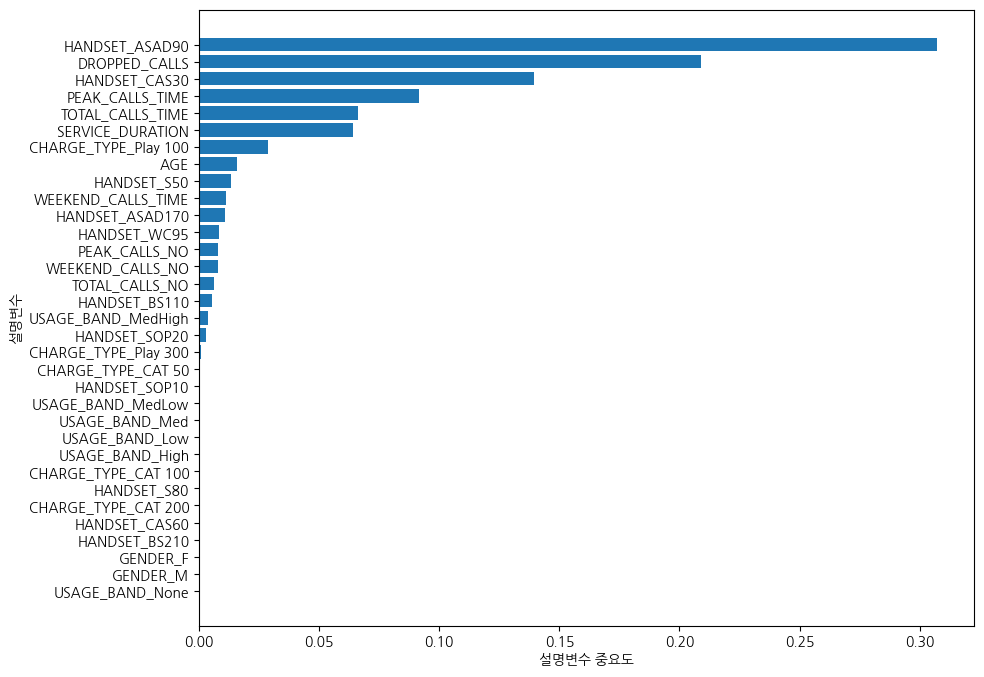

In [64]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
fig, ax = plt.subplots(figsize=(10, 8))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### XGBoost 모델

In [8]:
xgboost_raw = XGBClassifier(random_state = 1234)
xgboost_raw.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 1234,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [10]:
xgboost_raw.fit(df_train_x, df_train_y)
print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_raw.predict(df_train_x)
# 모델 평가
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_raw.predict(df_test_x)
# 모델 평가
eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[515   0]
 [  0 136]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[220  15]
 [ 16  28]] 

정확도: 0.8889
정밀도: 0.6512
재현율: 0.6364
F1    : 0.6437
AUC   : 0.7863


-> 과적합의 모습을 보인다

In [25]:
# 사용자 모델 생성
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=1234)
# 모델 적합
xgboost_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))


# 예측 및 모델 평가:Test  
xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[515   0]
 [  4 132]] 

정확도: 0.9939
정밀도: 1.0000
재현율: 0.9706
F1    : 0.9851
AUC   : 0.9853

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       515
           1       1.00      0.97      0.99       136

    accuracy                           0.99       651
   macro avg       1.00      0.99      0.99       651
weighted avg       0.99      0.99      0.99       651


 사용자 모델 평가 : Test 

오차행렬:
 [[225  10]
 [ 18  26]] 

정확도: 0.8996
정밀도: 0.7222
재현율: 0.5909
F1    : 0.6500
AUC   : 0.7742

               precision    recall  f1-score   support

           0       0.93      0.96      0.94       235
           1       0.72      0.59      0.65        44

    accuracy                           0.90       279
   macro avg       0.82      0.77      0.80       279
weighted avg       0.89      0.90      0.90       279



In [19]:
# Early stopping
eval_df = [(df_test_x, df_test_y)]

xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 7, random_state=1234)
xgb_stop.fit(df_train_x, df_train_y, 
            # 조기 중단 파라미터
             early_stopping_rounds = 150, eval_metric="logloss", eval_set = eval_df, verbose=True)

[0]	validation_0-logloss:0.63296
[1]	validation_0-logloss:0.58381
[2]	validation_0-logloss:0.54389
[3]	validation_0-logloss:0.50847
[4]	validation_0-logloss:0.47932
[5]	validation_0-logloss:0.45577
[6]	validation_0-logloss:0.42914
[7]	validation_0-logloss:0.40868
[8]	validation_0-logloss:0.39022
[9]	validation_0-logloss:0.37746
[10]	validation_0-logloss:0.36243
[11]	validation_0-logloss:0.35133
[12]	validation_0-logloss:0.34302
[13]	validation_0-logloss:0.33203
[14]	validation_0-logloss:0.32661
[15]	validation_0-logloss:0.31775
[16]	validation_0-logloss:0.31449
[17]	validation_0-logloss:0.30505
[18]	validation_0-logloss:0.30316
[19]	validation_0-logloss:0.29997
[20]	validation_0-logloss:0.29473
[21]	validation_0-logloss:0.28885
[22]	validation_0-logloss:0.28378
[23]	validation_0-logloss:0.27936
[24]	validation_0-logloss:0.27738
[25]	validation_0-logloss:0.27336
[26]	validation_0-logloss:0.27213
[27]	validation_0-logloss:0.26901
[28]	validation_0-logloss:0.26816
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1234, reg_alpha=0, reg_lambda=1, ...)

In [20]:
# 최적 모델 정보 확인
print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score)  

최적 횟수: 40
최적 성능(0-LogLoss): 0.2597638080297138


In [22]:
# 최적 모델 평가
xgb_train_pred_stop = xgb_stop.predict(df_train_x)
xgb_test_pred_stop = xgb_stop.predict(df_test_x)
print('\n 조기 중단 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_train_pred_stop)
print('\n',classification_report(df_train_y, xgb_train_pred_stop))

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Train 

오차행렬:
 [[513   2]
 [ 10 126]] 

정확도: 0.9816
정밀도: 0.9844
재현율: 0.9265
F1    : 0.9545
AUC   : 0.9613

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       515
           1       0.98      0.93      0.95       136

    accuracy                           0.98       651
   macro avg       0.98      0.96      0.97       651
weighted avg       0.98      0.98      0.98       651


 조기 중단 모델 평가 : Test 

오차행렬:
 [[224  11]
 [ 18  26]] 

정확도: 0.8961
정밀도: 0.7027
재현율: 0.5909
F1    : 0.6420
AUC   : 0.7721

               precision    recall  f1-score   support

           0       0.93      0.95      0.94       235
           1       0.70      0.59      0.64        44

    accuracy                           0.90       279
   macro avg       0.81      0.77      0.79       279
weighted avg       0.89      0.90      0.89       279



#### XGBoost 결론

처음에 만들었던 모델이 가지고 있던 과적합 문제를 사용자 정의 모델이나, 조기중단 모델에서는 보이지 않는다.     
사용자 정의 모델과 조기중단 모델의 정확도가 비슷한 것 또한 확인할 수 있다.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

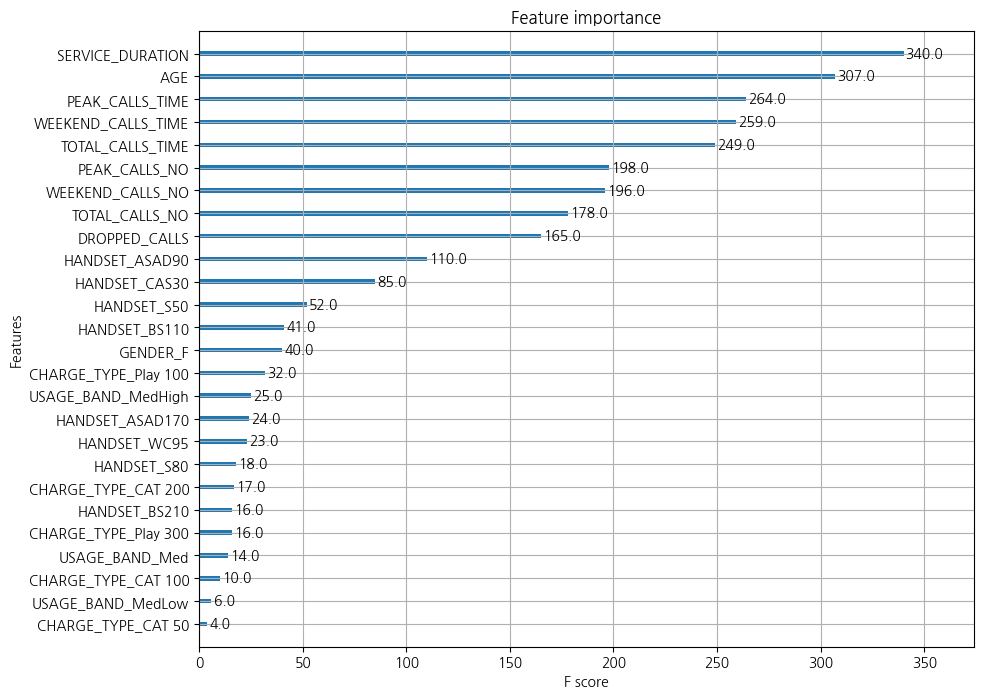

In [23]:
# 변수 중요도 확인 
#print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_stop, ax=ax)

그래디언트 부스팅 모델에 비해 더 다양한 변수를 적절히 참고하며 예측에 사용하는 모습을 볼 수 있다. 